# ***27/08/24***

In [1]:
import pandas as pd, numpy as np

In [2]:
# Example DataFrame
data = {'A': [1, 2, None, 4], 'B': [None, 2, 3, 4], 'C': [1, None, None, 4]}
df = pd.DataFrame(data)

# Original DataFrame
print("Original DataFrame:")
df

Original DataFrame:


,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,NaN
2,NaN,3.0,NaN
3,4.0,4.0,4.0


In [3]:
# Dropping rows with any missing values
df_cleaned_rows = df.dropna()
print("\nDataFrame after dropping rows with any missing values:")
df_cleaned_rows


DataFrame after dropping rows with any missing values:


,A,B,C
3,4.0,4.0,4.0


In [4]:
# Dropping columns with any missing values
df_cleaned_columns = df.dropna(axis=1)
print("\nDataFrame after dropping columns with any missing values:")
df_cleaned_columns


DataFrame after dropping columns with any missing values:


""
0
1
2
3


In [5]:
df['D'] = [3,5,7,8]
df

,A,B,C,D
0,1.0,NaN,1.0,3
1,2.0,2.0,NaN,5
2,NaN,3.0,NaN,7
3,4.0,4.0,4.0,8


In [6]:
# Filling missing values with a specific value (e.g., 0)
df_filled = df.fillna(0)
print("\nDataFrame after filling missing values with 0:")
df_filled


DataFrame after filling missing values with 0:


,A,B,C,D
0,1.0,0.0,1.0,3
1,2.0,2.0,0.0,5
2,0.0,3.0,0.0,7
3,4.0,4.0,4.0,8


In [7]:
# Filling missing values with the mean of the column
df_filled_mean = df.fillna(df.mean())
print("\nDataFrame after filling missing values with the mean of the column:")
df_filled_mean


DataFrame after filling missing values with the mean of the column:


,A,B,C,D
0,1.000000,3.0,1.0,3
1,2.000000,2.0,2.5,5
2,2.333333,3.0,2.5,7
3,4.000000,4.0,4.0,8


In [8]:
df.D = df.D.astype('float')
df

,A,B,C,D
0,1.0,NaN,1.0,3.0
1,2.0,2.0,NaN,5.0
2,NaN,3.0,NaN,7.0
3,4.0,4.0,4.0,8.0


In [9]:
# Handling Duplicate Rows
# Example DataFrame
data = {'A': [1, 2, 2, 4], 'B': [1, 2, 2, 4], 'C': [1, 2, 2, 4]}
df = pd.DataFrame(data)
df

,A,B,C
0,1,1,1
1,2,2,2
2,2,2,2
3,4,4,4


In [10]:
#Identifying the duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:")
duplicate_rows


Duplicate Rows:


,A,B,C
2,2,2,2


In [11]:
# Removing duplicate rows
df_no_duplicates = df.drop_duplicates()
print("\nDataFrame after removing duplicate rows:")
df_no_duplicates


DataFrame after removing duplicate rows:


,A,B,C
0,1,1,1
1,2,2,2
3,4,4,4


# Handling Outliers

Identifying Outliers Before handling outliers, you need to identify them. Common methods include:

***Z-Score:*** Data points with a Z-score greater than 3 or less than -3 are often considered outliers.

***IQR (Interquartile Range):*** Data points that fall below 𝑄 1 − 1.5 × 𝐼 𝑄 𝑅 Q1−1.5×IQR or above 𝑄 3 + 1.5 × 𝐼 𝑄 𝑅 Q3+1.5×IQR are considered outliers.

***Visualization:*** Use box plots, scatter plots.

In [12]:
from scipy import stats

In [13]:
# Example DataFrame
data = {'A': [1, 2, 3, 1000], 'B': [2, 3, 4, 5]}
df = pd.DataFrame(data)

# Original DataFrame
print("Original DataFrame:")
df

Original DataFrame:


,A,B
0,1,2
1,2,3
2,3,4
3,1000,5


# z-scores

In [14]:
# Detecting outliers using the Z-score
z_scores = np.abs(stats.zscore(df)) #The function np.abs() is used to get the absolute values of the Z-scores
print("\nZ-scores for each data point:")
z_scores


Z-scores for each data point:


,A,B
0,0.579664,1.341641
1,0.577349,0.447214
2,0.575035,0.447214
3,1.732048,1.341641


In [15]:
# Removing outliers (where Z-score > 3)
df_no_outliers = df[(z_scores < 3).all(axis=1)]
print("\nDataFrame after removing outliers:")
df_no_outliers


DataFrame after removing outliers:


,A,B
0,1,2
1,2,3
2,3,4
3,1000,5


# Interpreting Z-scores:
    
Z = 0: The data point is exactly at the mean.

Z > 0: The data point is above the mean.

Z < 0: The data point is below the mean.

Z = 1: The data point is one standard deviation above the mean.

Z = -1: The data point is one standard deviation below the mean.

Z > 2 or Z < -2: The data point is relatively far from the mean, and could be considered unusual.

Z > 3 or Z < -3: The data point is very far from the mean, and is typically considered an outlier.

The formula for calculating a Z-score is:

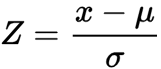

In [16]:
df1 = df.describe()
df1

,A,B
count,4.000000,4.000000
mean,251.500000,3.500000
std,499.000668,1.290994
min,1.000000,2.000000
25%,1.750000,2.750000
50%,2.500000,3.500000
75%,252.250000,4.250000
max,1000.000000,5.000000


In [17]:
z = (1000 - df1['A'][1])/(df1['A'][2])

In [18]:
z

1.499997991979968

# IQR

In [19]:
# Example DataFrame
data = {'A': [10, 12, 14, 16, 18, 20, 1000], 'B': [5, 6, 7, 8, 9, 10, 500]}
df = pd.DataFrame(data)
df

,A,B
0,10,5
1,12,6
2,14,7
3,16,8
4,18,9
5,20,10
6,1000,500


In [20]:
# Identify outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [21]:
IQR

A    6.0
B    3.0
dtype: float64

In [22]:
# Filtering out outliers
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers

,A,B
0,10,5
1,12,6
2,14,7
3,16,8
4,18,9
5,20,10


The code identifies rows in the DataFrame df where any value in the row is outside these boundaries (either too low or too high).

The ~ symbol is used to negate the condition, meaning it keeps only the rows where no outliers are present.

In [23]:
# Original DataFrame
print("Original DataFrame:")
print(df)

# DataFrame after removing outliers
print("\nDataFrame after removing outliers:")
print(df_no_outliers)

Original DataFrame:
      A    B
0    10    5
1    12    6
2    14    7
3    16    8
4    18    9
5    20   10
6  1000  500

DataFrame after removing outliers:
    A   B
0  10   5
1  12   6
2  14   7
3  16   8
4  18   9
5  20  10


Step-by-Step Explanation:
Calculate the First Quartile (Q1) and Third Quartile (Q3):

Q1: The 25th percentile of the data, meaning 25% of the data points are below this value.
Q3: The 75th percentile of the data, meaning 75% of the data points are below this value.
The IQR is calculated as
IQR
=
𝑄
3
−
𝑄
1
IQR=Q3−Q1.
Determine Outlier Boundaries:

Outliers are typically defined as values that lie outside the range:
[
𝑄
1
−
1.5
×
IQR
,
𝑄
3
+
1.5
×
IQR
]
[Q1−1.5×IQR,Q3+1.5×IQR]
Any value below
𝑄
1
−
1.5
×
IQR
Q1−1.5×IQR or above
𝑄
3
+
1.5
×
IQR
Q3+1.5×IQR is considered an outlier.
Filter Out Outliers:

The code identifies rows in the DataFrame df where any value in the row is outside these boundaries (either too low or too high).
The ~ symbol is used to negate the condition, meaning it keeps only the rows where no outliers are present.

# ***28/08/2024***

In [24]:
# Handling Inconsistent Data Types

# Example DataFrame
data = {'A': ['1', '2', 'three', '4'], 'B': ['1.1', '2.2', 'three', '4.4']}
df = pd.DataFrame(data)

# Original DataFrame
print("Original DataFrame:")
print(df)

# Converting to numeric, forcing invalid parsing to NaN
df['A'] = pd.to_numeric(df['A'], errors='coerce') #errors='coerce': Converts invalid parsing to NaN (Not a Number).
df['B'] = pd.to_numeric(df['B'], errors='coerce')
print("\nDataFrame after converting columns to numeric (forcing invalid to NaN):")
print(df)

# Dropping or filling rows where conversion resulted in NaN
df_cleaned = df.dropna()
print("\nDataFrame after dropping rows with NaN values:")
print(df_cleaned)

Original DataFrame:
       A      B
0      1    1.1
1      2    2.2
2  three  three
3      4    4.4

DataFrame after converting columns to numeric (forcing invalid to NaN):
     A    B
0  1.0  1.1
1  2.0  2.2
2  NaN  NaN
3  4.0  4.4

DataFrame after dropping rows with NaN values:
     A    B
0  1.0  1.1
1  2.0  2.2
3  4.0  4.4


In [25]:
# Dropping Irrelevant Columns

# Example DataFrame
data = {'A': [1, 2, 3, 4], 'B': [1, 2, 3, 4], 'C': ['NotNeeded1', 'NotNeeded2', 'NotNeeded3', 'NotNeeded4']}
df = pd.DataFrame(data)

# Original DataFrame
print("Original DataFrame:")
print(df)

df_cleaned = df.drop(columns=['C'])
print("\nDataFrame after dropping irrelevant columns:")
print(df_cleaned)

Original DataFrame:
   A  B           C
0  1  1  NotNeeded1
1  2  2  NotNeeded2
2  3  3  NotNeeded3
3  4  4  NotNeeded4

DataFrame after dropping irrelevant columns:
   A  B
0  1  1
1  2  2
2  3  3
3  4  4


In [26]:
# Handling Inconsistent Date Formats

data = {'Date': ['01/01/2020', '2020-02-01', 'March 3, 2020']}
df = pd.DataFrame(data)

# Original DataFrame
print("Original DataFrame:")
print(df)

# Converting to a consistent date format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print("\nDataFrame after converting to a consistent date format:")
print(df)

Original DataFrame:
            Date
0     01/01/2020
1     2020-02-01
2  March 3, 2020

DataFrame after converting to a consistent date format:
        Date
0 2020-01-01
1 2020-02-01
2 2020-03-03


1. errors='raise' (default): Raises an exception if any value cannot be converted to a numeric type.
    
2. errors='ignore': Leaves the data unchanged if conversion fails.

3. errors='coerce': Converts invalid parsing to NaN (Not a Number)

In [27]:
pd.to_datetime(df['Date'], format=("%m/%d/%Y", "%Y-%m-%d", "%B %d, %Y"), errors='coerce')

0   2020-01-01
1   2020-02-01
2   2020-03-03
Name: Date, dtype: datetime64[ns]

In [28]:
# Converting to a consistent date format
from dateutil import parser
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print("\nDataFrame after converting to a consistent date format:")
df


DataFrame after converting to a consistent date format:


,Date
0,2020-01-01
1,2020-02-01
2,2020-03-03


1) **What issues can arise from inconsistent data types in a dataset? Give example.**

**Ans-** *Inconsistent data types can cause several problems in a dataset, such as:*

*(i) Errors in Data Processing: Operations that depend on specific data types (e.g., mathematical calculations, date manipulations) may fail or produce incorrect results.*

*(ii) Difficulty in Data Analysis: Inconsistent data types can hinder the ability to group, filter, or sort data.*

*(iii) Inaccurate Modeling: Machine learning algorithms expect data in a consistent format. Inconsistent data types can lead to errors during model training or result in misleading outputs.*

*Example: A column named "Age" may have most entries as integers (e.g., 25, 30) but some as strings (e.g., "thirty"). When trying to calculate the average age, the string values will cause an error or be excluded, leading to incorrect results.*

--------------------------------------------------------------------------------------------------------------------------------

2) **What are irrelevant columns and how can they affect the results of a data analysis project?**

**Ans-** *Irrelevant columns are those that do not provide meaningful information for the analysis or have no correlation with the target variable in a predictive model.*

*Example: In a dataset predicting house prices, columns like "House Color" or "Owner's Name" might be irrelevant to the target variable (price). Including these in the model can lead to poorer performance as they do not contribute to the prediction.*

--------------------------------------------------------------------------------------------------------------------------------

3) **Why is it important to standardize data formats in a dataset? Give examples.**

**Ans-** *Standardizing data formats ensures consistency across the dataset, which is crucial for accurate data analysis and processing.*

*(i) Consistency in Analysis: Standardized formats allow for consistent data processing and analysis. For example, if dates are stored in different formats (e.g., "MM/DD/YYYY" vs. "DD-MM-YYYY"), it can lead to errors in date calculations or comparisons.*

*(ii)Improved Data Quality: Standardization helps in identifying and correcting data entry errors. For example, ensuring that all phone numbers follow the same format (e.g., "+1-XXX-XXX-XXXX") makes it easier to spot invalid entries.*

*Example: In a global sales dataset, standardizing the currency format (e.g., converting all values to USD) is essential for accurate financial analysis. Without this, comparing sales figures across different regions would be misleading.*

# 03/09/2024

When outliers are present we use median, when not present we use mean. This is so because outliers can affect the mean but median, as it lies in the middle isn't affected by outliers